# zipcode_dummies+price_transformation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [146]:
data=pd.read_csv(r"C:\Users\Akshaya\Desktop\python-great lakes\CAPSTONE\jupyter files\final_data_used.csv")

In [147]:
data.head()

,Unnamed: 0,host_id,host_is_superhost,host_identity_verified,zipcode,latitude,longitude,property_type,room_type,accommodates,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,No_of_amenities
0,0,2164,0,1,13355,52.54425,13.39749,Apartment,Private room,1,...,82.0,9.0,8.0,9.0,9.0,9.0,8.0,0,moderate,13
1,1,3718,0,1,10405,52.53500,13.41758,Apartment,Entire home/apt,4,...,93.0,9.0,9.0,9.0,9.0,10.0,9.0,0,strict_14_with_grace_period,19
2,2,4108,0,0,10777,52.49885,13.34906,Apartment,Private room,1,...,89.0,9.0,9.0,9.0,10.0,9.0,9.0,0,strict_14_with_grace_period,24
3,3,16149,0,1,10243,52.51171,13.45477,Loft,Entire home/apt,2,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,26
4,4,17391,1,1,10437,52.54316,13.41509,Apartment,Private room,2,...,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,15


In [55]:
data.columns

Index(['Unnamed: 0', 'host_id', 'host_is_superhost', 'host_identity_verified',
       'zipcode', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'cleaning_fee', 'guests_included', 'extra_people',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'No_of_amenities'],
      dtype='object')

In [56]:
data.drop(['Unnamed: 0', 'host_id','latitude', 'longitude','amenities'],axis=1,inplace=True)

In [57]:
data.head()

,host_is_superhost,host_identity_verified,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,No_of_amenities
0,0,1,13355,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,...,82.0,9.0,8.0,9.0,9.0,9.0,8.0,0,moderate,13
1,0,1,10405,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,...,93.0,9.0,9.0,9.0,9.0,10.0,9.0,0,strict_14_with_grace_period,19
2,0,0,10777,Apartment,Private room,1,1.0,1.0,1.0,Pull-out Sofa,...,89.0,9.0,9.0,9.0,10.0,9.0,9.0,0,strict_14_with_grace_period,24
3,0,1,10243,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,26
4,1,1,10437,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,...,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,15


In [58]:
data['price']=(np.log(np.log(data['price'])))

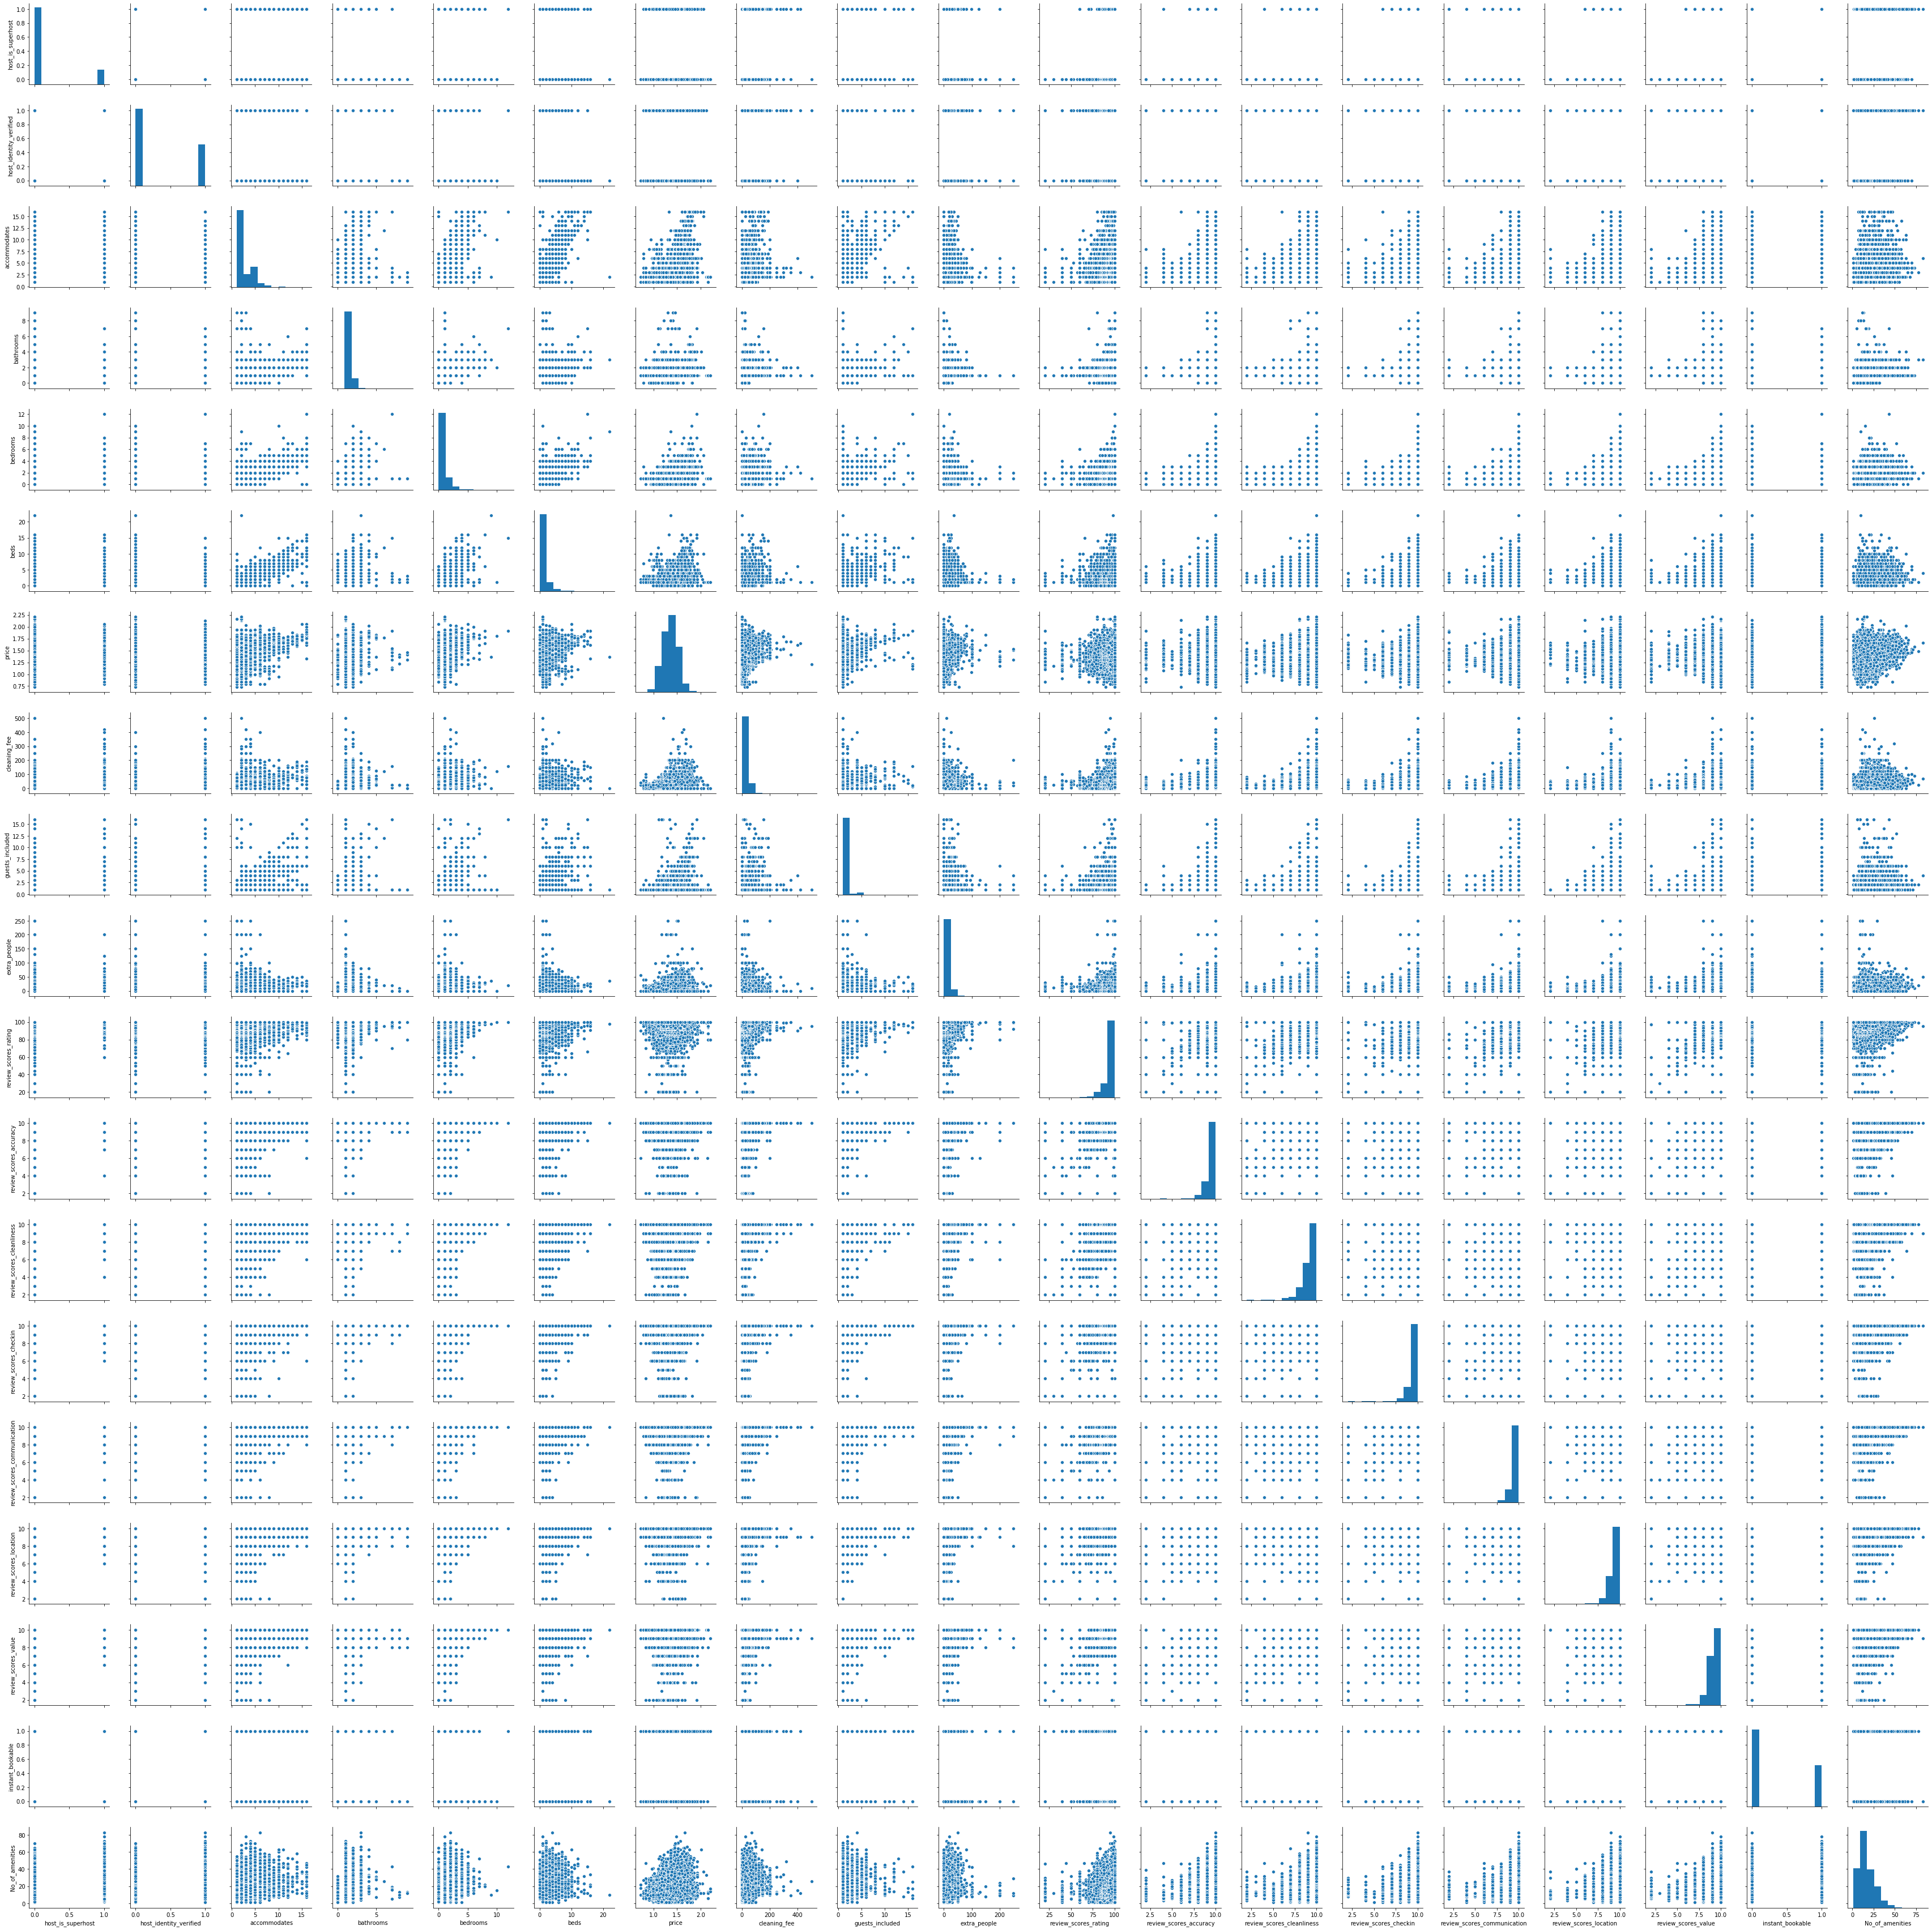

In [18]:
sns.pairplot(data)

In [59]:
data.columns

Index(['host_is_superhost', 'host_identity_verified', 'zipcode',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'cleaning_fee', 'guests_included',
       'extra_people', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'No_of_amenities'],
      dtype='object')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24558 entries, 0 to 24557
Data columns (total 24 columns):
host_is_superhost              24558 non-null int64
host_identity_verified         24558 non-null int64
zipcode                        24020 non-null object
property_type                  24558 non-null object
room_type                      24558 non-null object
accommodates                   24558 non-null int64
bathrooms                      24558 non-null float64
bedrooms                       24558 non-null float64
beds                           24558 non-null float64
bed_type                       24558 non-null object
price                          24558 non-null float64
cleaning_fee                   24558 non-null float64
guests_included                24558 non-null int64
extra_people                   24558 non-null float64
review_scores_rating           24558 non-null float64
review_scores_accuracy         24558 non-null float64
review_scores_cleanliness      24558 no

In [61]:
data['cleaning_fee']=(np.log(data['cleaning_fee']+1))

In [62]:
data1=pd.get_dummies(data,columns=['zipcode','property_type', 'room_type','bed_type','cancellation_policy'],drop_first=True)

In [64]:
y=data1['price']
X=data1.drop('price',axis=1)

In [65]:
import statsmodels.api as sm
xc=sm.add_constant(X)
lin_reg=sm.OLS(y,xc)
result=lin_reg.fit()
print(result.summary())

C:\Users\Akshaya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     114.2
Date:                Mon, 13 Jan 2020   Prob (F-statistic):               0.00
Time:                        12:25:05   Log-Likelihood:                 20283.
No. Observations:               24558   AIC:                        -4.002e+04
Df Residuals:                   24287   BIC:                        -3.783e+04
Df Model:                         270                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

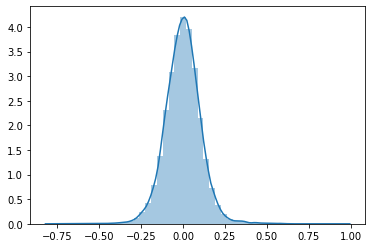

In [66]:
residuals=result.resid
sns.distplot(residuals)
plt.show()

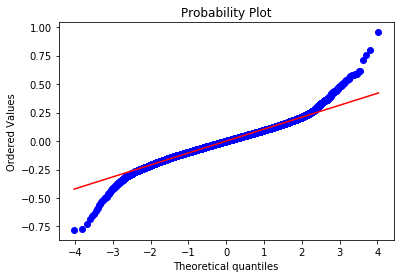

In [67]:
import scipy.stats as stats
stats.probplot(residuals,plot=plt)
plt.show()

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
pd.DataFrame({'vif':vif},index=X.columns)

,vif
host_is_superhost,1.457498
host_identity_verified,1.633261
accommodates,13.966627
bathrooms,10.211232
bedrooms,7.802215
beds,8.293751
cleaning_fee,9.894555
guests_included,5.370230
extra_people,1.854135
review_scores_rating,378.784365


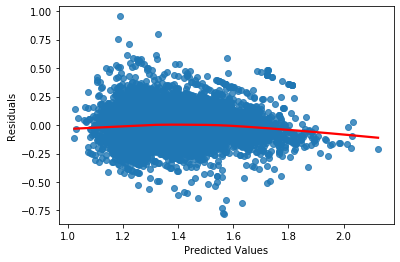

In [69]:
residuals=result.resid
y_pred=result.predict(xc)
sns.regplot(x=y_pred,y=residuals,line_kws={'color':'r'},lowess=True)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

## Ridge

In [76]:
n_alphas=1000
alphas=np.logspace(-10,10)
ridge_cv=RidgeCV(alphas=alphas,store_cv_values=True)
ridge_cv.fit(X,y)

ridge_cv.alpha_

4.094915062380419

In [77]:
ridge=Ridge(alpha=4.094915062380419)
ridge.fit(X,y)
ridge.coef_
pd.DataFrame(ridge.coef_,X.columns,columns=['coefs'])

,coefs
host_is_superhost,0.005490
host_identity_verified,0.001585
accommodates,0.026284
bathrooms,0.009619
bedrooms,0.021138
beds,-0.007943
cleaning_fee,0.005255
guests_included,0.010625
extra_people,0.000229
review_scores_rating,0.000580


## Lasso

In [82]:
n_alphas=1000
alphas=np.linspace(0.001,5,n_alphas)
lasso_cv=LassoCV(alphas=alphas,cv=3, random_state=22)
lasso_cv.fit(X,y)

LassoCV(alphas=array([1.00000000e-03, 6.00400400e-03, 1.10080080e-02, 1.60120120e-02,
       2.10160160e-02, 2.60200200e-02, 3.10240240e-02, 3.60280280e-02,
       4.10320320e-02, 4.60360360e-02, 5.10400400e-02, 5.60440440e-02,
       6.10480480e-02, 6.60520521e-02, 7.10560561e-02, 7.60600601e-02,
       8.10640641e-02, 8.60680681e-02, 9.10720721e-02, 9.60760761e-02,
       1.01080080e-01, 1.06084084e-0...
       4.94495596e+00, 4.94995996e+00, 4.95496396e+00, 4.95996797e+00,
       4.96497197e+00, 4.96997598e+00, 4.97497998e+00, 4.97998398e+00,
       4.98498799e+00, 4.98999199e+00, 4.99499600e+00, 5.00000000e+00]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=22, selection='cyclic', tol=0.0001,
        verbose=False)

In [83]:
lasso_cv.alpha_

0.001

In [86]:
lasso=Lasso(alpha=0.001)
lasso.fit(X,y)
lasso.coef_
pd.DataFrame(lasso.coef_,X.columns,columns=['coefs'])

,coefs
host_is_superhost,0.001340
host_identity_verified,0.000000
accommodates,0.026415
bathrooms,0.005987
bedrooms,0.019015
beds,-0.006954
cleaning_fee,0.005870
guests_included,0.009749
extra_people,0.000359
review_scores_rating,0.000465


## ElasticNet

In [85]:
from sklearn.linear_model import ElasticNet,ElasticNetCV
n_alphas=1000
alphas=np.logspace(-6,6,n_alphas)
elastic_cv=ElasticNetCV(alphas=alphas,cv=3)
elastic_cv.fit(X,y)
elastic_cv.alpha_

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.043453002015041875, tolerance: 0.04081497269578225
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04512998768566945, tolerance: 0.04081497269578225
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04660683888891981, tolerance: 0.04081497269578225
  tol, rng, random, positive)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not c

0.00018124175473742377

In [87]:
enet=ElasticNet(alpha=0.0001)
enet.fit(X,y)
pd.DataFrame(enet.coef_,X.columns,columns=['coefs'])

,coefs
host_is_superhost,0.005441
host_identity_verified,0.001627
accommodates,0.026452
bathrooms,0.009336
bedrooms,0.021106
beds,-0.008236
cleaning_fee,0.005407
guests_included,0.010797
extra_people,0.000247
review_scores_rating,0.000558


In [89]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
enet=ElasticNet(alpha=0.0001)
lasso=Lasso(alpha=0.001)
ridge=Ridge(alpha=4.094915062380419)
models=[]

In [91]:
models.append(('Linear',LR))
models.append(('Ridge',ridge))
models.append(('Lasso',lasso))
models.append(('ElasticNet',enet))

In [94]:
from sklearn import model_selection
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f))' %(name,np.mean(cv_results),np.var(cv_results,ddof=1)))

Linear: -435786052109894912.000000 (1063346447705179864510602679074947072.000000))
Ridge: 0.547191 (0.000083))
Lasso: 0.485116 (0.000154))
Linear: -435786052109894912.000000 (1063346447705179864510602679074947072.000000))
Ridge: 0.547191 (0.000083))
Lasso: 0.485116 (0.000154))
ElasticNet: 0.543650 (0.000097))


In [98]:
from sklearn import model_selection
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f))' %(name,np.mean(cv_results),np.var(cv_results,ddof=1)))

Linear: -11195125622433908.000000 (707064951950734504659018368155648.000000))
Ridge: -0.011530 (0.000000))
Lasso: -0.013109 (0.000000))
Linear: -11195125622433908.000000 (707064951950734504659018368155648.000000))
Ridge: -0.011530 (0.000000))
Lasso: -0.013109 (0.000000))
ElasticNet: -0.011620 (0.000000))


In [99]:
from sklearn import model_selection
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_absolute_error')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f))' %(name,np.mean(cv_results),np.var(cv_results,ddof=1)))

Linear: -1056831.303646 (4301623999660.580566))
Ridge: -0.080994 (0.000001))
Lasso: -0.085787 (0.000001))
Linear: -1056831.303646 (4301623999660.580566))
Ridge: -0.080994 (0.000001))
Lasso: -0.085787 (0.000001))
ElasticNet: -0.081260 (0.000001))


### REgressors

In [120]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
criterion='mse',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    presort=False

In [127]:
from sklearn.model_selection import GridSearchCV


dt=DecisionTreeRegressor(random_state=0)
param={
'max_features' : ['auto', 'sqrt'],
'max_depth' :np.arange(1,10),
'min_samples_split' :[2, 5, 10],
'min_samples_leaf' : [1, 2, 4]}
GS=GridSearchCV(dt,param,cv=3,scoring='r2')
GS.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=0,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         '

In [129]:
print(GS.best_score_)
print(GS.best_params_)
print(GS.best_estimator_)

0.4377230461637079
{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}
DecisionTreeRegressor(criterion='mse', max_depth=8, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')


In [130]:
dt=DecisionTreeRegressor(random_state=0)
param={
'max_features' : ['auto', 'sqrt'],
'max_depth' :np.arange(1,10),
'min_samples_split' :[2, 5, 10],
'min_samples_leaf' : [1, 2, 4]}
GS=GridSearchCV(dt,param,cv=3,scoring='neg_mean_absolute_error')
GS.fit(X,y)

print(GS.best_score_)
print(GS.best_params_)
print(GS.best_estimator_)

-0.0882984272307156
{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}
DecisionTreeRegressor(criterion='mse', max_depth=8, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')


## KNN

In [133]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knn=KNeighborsRegressor()
param={'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
GS=GridSearchCV(knn,param,cv=3,scoring='r2')
GS.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [134]:
print(GS.best_score_)
print(GS.best_params_)
print(GS.best_estimator_)

0.3346128864864197
{'n_neighbors': 19, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                    weights='distance')


## RF

In [137]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
param={
'max_features' : ['auto', 'sqrt'],
'max_depth' :np.arange(1,10),
'min_samples_split' :[2, 5, 10],
'min_samples_leaf' : [1, 2, 4]}
GS=GridSearchCV(rf,param,cv=3,scoring='r2')
GS.fit(X,y)
print(GS.best_score_)
print(GS.best_params_)
print(GS.best_estimator_)

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest

0.4727836655964675
{'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


## Bagging- r2

In [139]:
from sklearn.ensemble import BaggingRegressor
import warnings
warnings.filterwarnings("ignore")


alg=['DT','KNN','LR']
for i in alg:
    if i=='DT':
        results=[]
        cart = DecisionTreeRegressor(random_state=0,max_depth= 8, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 10)
        model = BaggingRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()
 
    elif i=='KNN':
        results=[]
        cart =KNeighborsRegressor(n_neighbors= 19, weights= 'distance')
        model = BaggingRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()
 
    else:
        results=[]
        cart =LinearRegression()
        model = BaggingRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()

DT: 0.546361 (0.000192))

KNN: 0.428257 (0.000242))

LR: -18598045278864368.000000 (2054239348360073602452259061366784.000000))



## Adaboost

In [140]:
from sklearn.ensemble import AdaBoostRegressor
alg=['RF','DT','KNN','LR']
for i in alg:
    if i=='DT':
        results=[]
        cart = DecisionTreeRegressor(random_state=0,max_depth= 8, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 10)
        model = AdaBoostRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()
 
    elif i =='RF':
        results=[]
        cart = RandomForestRegressor(max_depth= 9, max_features= 'auto', min_samples_leaf= 2,min_samples_split= 10)
        model = AdaBoostRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()
 
    elif i=='KNN':
        results=[]
        cart =KNeighborsRegressor(n_neighbors= 19, weights= 'distance')
        model = AdaBoostRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()
 
    else:
        results=[]
        cart =LinearRegression()
        model = AdaBoostRegressor(base_estimator=cart, random_state=0)       
        kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
        cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
        results.append(cv_results)
        
        print('%s: %f (%f))' %(i,np.mean(cv_results),np.var(cv_results,ddof=1)))
        print()

RF: 0.537722 (0.000243))

DT: 0.507563 (0.000190))



KeyboardInterrupt: 

In [141]:
## Adaboost 
results=[]
cart =KNeighborsRegressor(n_neighbors= 19, weights= 'distance')
model = AdaBoostRegressor(base_estimator=cart, random_state=0)       
kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
cv_results=model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2')
results.append(cv_results)
print('%s: %f (%f))' %('KNN',np.mean(cv_results),np.var(cv_results,ddof=1)))
print()

KeyboardInterrupt: 

# Significant variables only

In [150]:
data2=data.copy()

In [153]:
data2.columns

Index(['Unnamed: 0', 'host_id', 'host_is_superhost', 'host_identity_verified',
       'zipcode', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'cleaning_fee', 'guests_included', 'extra_people',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'No_of_amenities'],
      dtype='object')

In [154]:
data2.drop(['Unnamed: 0', 'host_id', 'latitude', 'longitude', 'property_type','accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities','review_scores_rating', 'review_scores_accuracy','review_scores_checkin',
       'review_scores_communication', 'review_scores_location','instant_bookable', 'cancellation_policy'],axis=1,inplace=True)

In [158]:
data2=data2[data2['zipcode'].notna()]

In [161]:
data2=pd.get_dummies(data2,columns=['zipcode','room_type'])

In [163]:
y=data2['price']
X=data2.drop('price',axis=1)

In [164]:
import statsmodels.api as sm
xc=sm.add_constant(X)
lin_reg=sm.OLS(y,xc)
result=lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     30.84
Date:                Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:27:38   Log-Likelihood:            -1.6014e+05
No. Observations:               24020   AIC:                         3.207e+05
Df Residuals:                   23799   BIC:                         3.225e+05
Df Model:                         220                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 